In [59]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

data = pd.read_csv("dataset.csv")
dataV = pd.read_csv("validation_set.csv")

dataV.head(2)

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,300000,2,2,2,32,0,0,0,0,...,20111,8738,250,0,1321,9160,1000,250,0,0
1,1,360000,2,2,2,47,-2,-2,-2,-2,...,7486,24472,5935,4999,7148,8063,25217,6487,5000,0


In [60]:
#Renaming feature for ease of use. 
data = data.rename(columns={"default payment next month": "default"})

In [61]:
data.default.value_counts()

0    17523
1     4977
Name: default, dtype: int64

## Data exploration

### Age

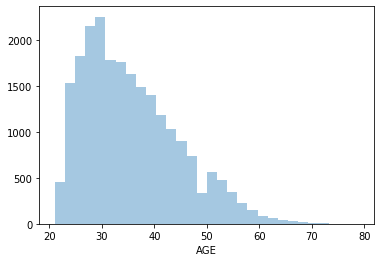

In [62]:
sns.distplot(data['AGE'],kde=False, bins=30);

### Education

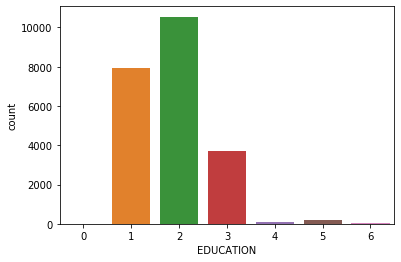

In [63]:
sns.countplot(x="EDUCATION", data=data);

In [64]:
data.EDUCATION.value_counts()

2    10546
1     7921
3     3690
5      205
4       90
6       35
0       13
Name: EDUCATION, dtype: int64

In [65]:
#There is no information in the dictionary about the meaning of 0,5, or 6. 
#Since they are not very big I will code them all under the "other"=4 category

data.loc[data['EDUCATION'] == 0, 'EDUCATION'] = 4
data.loc[data['EDUCATION'] == 5, 'EDUCATION'] = 4
data.loc[data['EDUCATION'] == 6, 'EDUCATION'] = 4
data.EDUCATION.value_counts()

2    10546
1     7921
3     3690
4      343
Name: EDUCATION, dtype: int64

In [66]:
dataV.loc[dataV['EDUCATION'] == 0, 'EDUCATION'] = 4
dataV.loc[dataV['EDUCATION'] == 5, 'EDUCATION'] = 4
dataV.loc[dataV['EDUCATION'] == 6, 'EDUCATION'] = 4
dataV.EDUCATION.value_counts()

2    3484
1    2664
3    1227
4     125
Name: EDUCATION, dtype: int64

In [67]:
edu = pd.crosstab(data['EDUCATION'], data['default'])
edu['%'] = (edu[1]/(edu[0]+edu[1]))
edu

default,0,1,%
EDUCATION,,,
1,6397,1524,0.192400
2,8039,2507,0.237720
3,2768,922,0.249864
4,319,24,0.069971


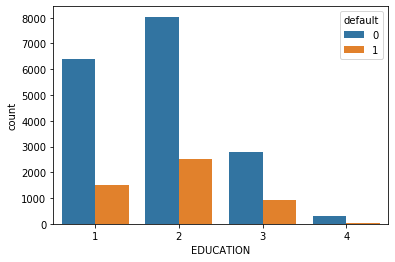

In [68]:
sns.countplot(x='EDUCATION',hue = "default", data = data);

clients with more education lower persentage of default. It would be nice to know what cat=4 means

### Sex

In [69]:
#Makes a dummy variable for male =1
data.loc[data.SEX ==2, 'SEX'] = 0
data.rename({"SEX": "MALE"}, axis=1, inplace=True)
data.MALE.value_counts()

0    13557
1     8943
Name: MALE, dtype: int64

In [70]:
#Makes a dummy variable for male =1
dataV.loc[dataV.SEX ==2, 'SEX'] = 0
dataV.rename({"SEX": "MALE"}, axis=1, inplace=True)
dataV.MALE.value_counts()

0    4555
1    2945
Name: MALE, dtype: int64

In [71]:
sex = pd.crosstab(data.MALE, data.default)
sex['%']=sex[1]/(sex[0]+sex[1])
sex

default,0,1,%
MALE,,,
0,10731,2826,0.208453
1,6792,2151,0.240523


males are have a higher proportion of default

### MARRIAGE

In [72]:
# I will code the unexplain category 0 in to the "other"=3 category
data.loc[data['MARRIAGE'] == 0, 'MARRIAGE'] = 3
data['MARRIAGE'].value_counts()

2    11942
1    10281
3      277
Name: MARRIAGE, dtype: int64

In [73]:
# I will code the unexplain category 0 in to the "other"=3 category
dataV.loc[dataV['MARRIAGE'] == 0, 'MARRIAGE'] = 3
dataV['MARRIAGE'].value_counts()

2    4022
1    3378
3     100
Name: MARRIAGE, dtype: int64

In [74]:
mar = pd.crosstab(data.MARRIAGE, data.default)
mar['%']=mar[1]/(mar[0]+mar[1])
mar

default,0,1,%
MARRIAGE,,,
1,7876,2405,0.233927
2,9434,2508,0.210015
3,213,64,0.231047


Married and "other" clients are more likely to default. Other could be divorsed ?

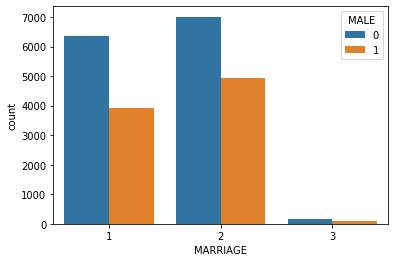

In [75]:
sns.countplot(x='MARRIAGE',hue = "MALE", data = data);

### Continuous features

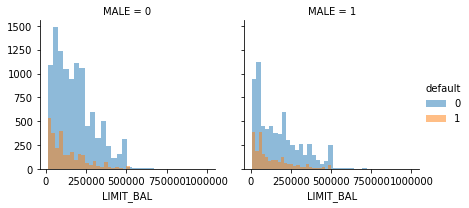

In [76]:
g = sns.FacetGrid(data, col='MALE', hue='default')
g.map(plt.hist, 'LIMIT_BAL', alpha=.5, bins=30)
g.add_legend();

In [77]:
pay_data = data[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
pay_data.head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,2,2,2,2
1,-2,-2,-2,-2,-2,-2
2,0,0,2,0,0,0
3,0,0,0,-1,0,0
4,-1,-1,-1,-2,-2,-2


I think that 2=no consumption, -1=pay duly, 0=the use of revolving credit could be reduced into one category and then delay months could be bag into a few categories (?)

In [78]:
pay_data['pay_0'] = pay_data['PAY_0'].apply(lambda x: 0 if (x ==-2) | (x ==-1) | (x ==0) else 1)
pay_data['pay_2'] = pay_data['PAY_2'].apply(lambda x: 0 if (x ==-2) | (x ==-1) | (x ==0) else 1)
pay_data['pay_3'] = pay_data['PAY_3'].apply(lambda x: 0 if (x ==-2) | (x ==-1) | (x ==0) else 1)
pay_data['pay_4'] = pay_data['PAY_4'].apply(lambda x: 0 if (x ==-2) | (x ==-1) | (x ==0) else 1)
pay_data['pay_5'] = pay_data['PAY_5'].apply(lambda x: 0 if (x ==-2) | (x ==-1) | (x ==0) else 1)
pay_data['pay_6'] = pay_data['PAY_6'].apply(lambda x: 0 if (x ==-2) | (x ==-1) | (x ==0) else 1)

/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [79]:
pay = pd.crosstab(pay_data['PAY_3'],data['default'])
pay['%']=pay[1]/(pay[0]+pay[1])
pay

default,0,1,%
PAY_3,,,
-2,2475,562,0.185051
-1,3768,722,0.160802
0,9774,2056,0.173795
1,1,1,0.500000
2,1388,1459,0.512469
3,75,108,0.590164
4,26,33,0.559322
5,4,6,0.600000
6,7,9,0.562500


In [80]:
pay = pd.crosstab(pay_data['pay_0'],data['default'])
pay['%']=pay[1]/(pay[0]+pay[1])
pay

default,0,1,%
pay_0,,,
0,14957,2433,0.139908
1,2566,2544,0.497847


In [81]:
pay_data['pay_0'] = pay_data['PAY_0'].apply(lambda x: 0 if (x ==-2) | (x ==-1) | (x ==0) else 1)
pay_data['pay_2'] = pay_data['PAY_2'].apply(lambda x: 0 if (x ==-2) | (x ==-1) | (x ==0) else 1)
pay_data['pay_3'] = pay_data['PAY_3'].apply(lambda x: 0 if (x ==-2) | (x ==-1) | (x ==0) else 1)
pay_data['pay_4'] = pay_data['PAY_4'].apply(lambda x: 0 if (x ==-2) | (x ==-1) | (x ==0) else 1)
pay_data['pay_5'] = pay_data['PAY_5'].apply(lambda x: 0 if (x ==-2) | (x ==-1) | (x ==0) else 1)
pay_data['pay_6'] = pay_data['PAY_6'].apply(lambda x: 0 if (x ==-2) | (x ==-1) | (x ==0) else 1)

data['pay_hist'] = pay_data[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5','pay_6']].sum(axis=1)
dataV['pay_hist'] = pay_data[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5','pay_6']].sum(axis=1)


/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [82]:
pay = pd.crosstab(data['pay_hist'],data['default'])
pay['%']=pay[1]/(pay[0]+pay[1])
pay

default,0,1,%
pay_hist,,,
0,13202,1782,0.118927
1,2312,995,0.300877
2,882,540,0.379747
3,433,422,0.493567
4,301,403,0.572443
5,94,133,0.585903
6,299,702,0.701299


In [83]:
def make_percent(col):
    
    due =col[0]
    paid =col[1]
    
    if paid >= 0 and due <= 0:
        return 1.0
    else:
        return paid/due

In [84]:
data['BAL_PAY_1'] = data[['BILL_AMT2', 'PAY_AMT1']].apply(make_percent, axis=1)
data['BAL_PAY_2'] = data[['BILL_AMT3', 'PAY_AMT2']].apply(make_percent, axis=1)
data['BAL_PAY_3'] = data[['BILL_AMT4', 'PAY_AMT3']].apply(make_percent, axis=1)
data['BAL_PAY_4'] = data[['BILL_AMT5', 'PAY_AMT4']].apply(make_percent, axis=1)
data['BAL_PAY_5'] = data[['BILL_AMT6', 'PAY_AMT5']].apply(make_percent, axis=1)

In [85]:
dataV['BAL_PAY_1'] = dataV[['BILL_AMT2', 'PAY_AMT1']].apply(make_percent, axis=1)
dataV['BAL_PAY_2'] = dataV[['BILL_AMT3', 'PAY_AMT2']].apply(make_percent, axis=1)
dataV['BAL_PAY_3'] = dataV[['BILL_AMT4', 'PAY_AMT3']].apply(make_percent, axis=1)
dataV['BAL_PAY_4'] = dataV[['BILL_AMT5', 'PAY_AMT4']].apply(make_percent, axis=1)
dataV['BAL_PAY_5'] = dataV[['BILL_AMT6', 'PAY_AMT5']].apply(make_percent, axis=1)

In [86]:
dataV[['BAL_PAY_1','BAL_PAY_2','BAL_PAY_3','BAL_PAY_4','BAL_PAY_5']].describe()

,BAL_PAY_1,BAL_PAY_2,BAL_PAY_3,BAL_PAY_4,BAL_PAY_5
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,0.431407,1.101844,0.433485,0.460607,0.491500
std,1.315759,57.746205,1.002303,1.748569,2.687709
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.044601,0.044785,0.037612,0.036381,0.038162
50%,0.101756,0.103776,0.083480,0.079132,0.093332
75%,1.000000,1.000000,1.000000,1.000000,1.000000
max,101.010101,5001.000000,68.027211,129.705128,204.000883


In [87]:
data["utilization"]= data.BILL_AMT1/data.LIMIT_BAL
dataV["utilization"]= data.BILL_AMT1/data.LIMIT_BAL

In [31]:
dataV.keys()

Index(['Unnamed: 0', 'LIMIT_BAL', 'MALE', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'pay_hist', 'BAL_PAY_1', 'BAL_PAY_2', 'BAL_PAY_3', 'BAL_PAY_4',
       'BAL_PAY_5', 'utilization'],
      dtype='object')

In [100]:
data_original = data.drop(['Unnamed: 0','pay_hist', 'BAL_PAY_1', 'BAL_PAY_2', 'BAL_PAY_3',
       'BAL_PAY_4', 'BAL_PAY_5', 'utilization'], axis=1)
data_original_VALIDATION = dataV.drop(['Unnamed: 0','pay_hist', 'BAL_PAY_1', 'BAL_PAY_2', 'BAL_PAY_3',
       'BAL_PAY_4', 'BAL_PAY_5', 'utilization'], axis=1)

In [101]:
data_simple = data.drop(['Unnamed: 0','BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'pay_hist', 'BAL_PAY_1', 'BAL_PAY_2', 'BAL_PAY_3',
       'BAL_PAY_4', 'BAL_PAY_5', 'utilization','LIMIT_BAL'], axis=1)
data_simple_VALIDATION = dataV.drop(['Unnamed: 0','BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'pay_hist', 'BAL_PAY_1', 'BAL_PAY_2', 'BAL_PAY_3',
       'BAL_PAY_4', 'BAL_PAY_5', 'utilization','LIMIT_BAL'], axis=1)

In [102]:
data_new = data.drop(['Unnamed: 0','BILL_AMT1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
        'LIMIT_BAL'], axis=1)
data_new_VALIDATION = dataV.drop(['Unnamed: 0','BILL_AMT1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
        'LIMIT_BAL'], axis=1)

In [97]:
data_simple.shape

(22500, 11)

In [ ]:
# data.drop(data[data['BAL_PAY_1'] > 10].index, inplace = True)
# data.drop(data[data['BAL_PAY_2'] > 10].index, inplace = True)
# data.drop(data[data['BAL_PAY_3'] > 10].index, inplace = True)
# data.drop(data[data['BAL_PAY_4'] > 10].index, inplace = True)
# data.drop(data[data['BAL_PAY_5'] > 10].index, inplace = True)

### handling class imbalances

In [ ]:
from sklearn.utils import resample
# separate minority and majority classes for data simple
good = data_simple[data_simple.default==0]
default= data_simple[data_simple.default==1]

In [ ]:
# separate minority and majority classes for data original
good = data_original[data_original.default==0]
default= data_original[data_original.default==1]

In [ ]:
# separate minority and majority classes for data new
good = data_new[data_new.default==0]
default= data_new[data_new.default==1]

In [ ]:
len(default)

In [ ]:
from sklearn.utils import resample

In [ ]:
# upsample minority
default_upsampled = resample(default,
                          replace=True, # sample with replacement
                          n_samples=len(good), # match number in majority class
                          random_state=46) # reproducible results

In [ ]:
# combine majority and upsampled minority
upsampled = pd.concat([good, default_upsampled])

# check new class counts
upsampled.default.value_counts()

In [ ]:
y_train = upsampled.default
X_train = upsampled.drop('default', axis=1)

In [ ]:
y_train.shape

In [ ]:
X_train.shape

### Tree and randon Tree Model with cross validation and SMOTE

In [ ]:
from numpy import mean
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [ ]:
data_original.head(2)

In [ ]:
# define target feature
X = data_new.drop(["default"]  ,axis=1)
y = data["default"]

In [ ]:
X.shape

In [ ]:
y.value_counts()

In [ ]:
#define model
model = DecisionTreeClassifier()

In [ ]:
#evaluate pipeline
cv= RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('Mean f1: %.3f' %mean(scores))

#### with SMOTE

In [ ]:
#define a pipeline that first transform the training dataset with SMOTE
steps = [('over',SMOTE()),('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

In [ ]:
#evaluate pipeline
cv= RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('Mean f1: %.3f' %mean(scores))

### correlation

In [ ]:
sns.set(style="white")


# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.3, cbar_kws={"shrink": .3});

In [ ]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [ ]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
data.drop(columns=to_drop, inplace=True)

In [ ]:
to_drop

###  Models

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.utils import resample
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


##### new data

In [38]:
X = data_new.drop(["default"]  ,axis=1)
y = data_new["default"]
X.shape

(22500, 12)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [40]:
sm = SMOTE(sampling_strategy='minority', random_state=23)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [41]:
y_train.value_counts()

1    13150
0    13150
Name: default, dtype: int64

##### simple

In [103]:
X = data_simple.drop(["default"]  ,axis=1)
y = data_simple["default"]
X.shape

(22500, 10)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)


In [105]:
sm = SMOTE(sampling_strategy='minority', random_state=23)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [106]:
y_train.value_counts()

1    13150
0    13150
Name: default, dtype: int64

##### original data

In [116]:
X = data_original.drop(["default"]  ,axis=1)
y = data_original["default"]
X.head(2)

,LIMIT_BAL,MALE,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,200000,0,3,1,30,2,2,2,2,2,...,145374,147273,149244,151973,6600,6000,5860,6000,5000,0
1,200000,0,4,2,27,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [118]:
sm = SMOTE(sampling_strategy='minority', random_state=23)
X_train, y_train = sm.fit_sample(X_train, y_train)

#### Decision Tree

In [119]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

In [120]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#predict the training set
y_pred_train = clf.predict(X_train)

#Predict the response for test dataset
y_pred_test = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

Training F1 Score: 0.7093849546679735
Testing F1 Score: 0.4811672887682389


In [ ]:
print(classification_report(y_test, y_pred_test))

In [ ]:
confusion_matrix(y_test, y_pred_test)

#### Randon forest

In [121]:
ran_tree = RandomForestClassifier(n_estimators=100, random_state=0, 
                                  max_depth=8)

In [122]:
ran_tree.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [123]:
#predict the training set
y_pred_train = ran_tree.predict(X_train)

#Predict the response for test dataset
y_pred_test = ran_tree.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

Training F1 Score: 0.7769385295299317
Testing F1 Score: 0.5005456529647145


In [124]:
confusion_matrix(y_test, y_pred_test)

array([[3564,  809],
       [ 564,  688]])

In [ ]:
print(classification_report(y_test, y_pred_test))

#### Logistic

In [125]:
lr = LogisticRegression(solver='liblinear')

In [126]:
X_train.shape

(26300, 23)

In [127]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
#predict the training set
y_pred_train = lr.predict(X_train)

#Predict the response for test dataset
y_pred_test = lr.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

Training F1 Score: 0.6667140774455073
Testing F1 Score: 0.42029345933847295


In [46]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      4373
           1       0.46      0.56      0.51      1252

    accuracy                           0.76      5625
   macro avg       0.66      0.69      0.67      5625
weighted avg       0.78      0.76      0.76      5625



In [ ]:
confusion_matrix(y_test, y_pred_test)

#### Grid Random Tree

In [ ]:
param_grid_ran= {"max_depth":[1,5,7,9,15,20],
                'n_estimators': [100,200,300]}

In [ ]:
CV_rfc = GridSearchCV(RandomForestClassifier(), param_grid_ran, 
                      cv=5,n_jobs=-1, scoring='f1', verbose=1)

In [ ]:
# fit the grid with data
CV_rfc.fit(X_train, y_train)

In [ ]:
print(CV_rfc.best_score_)
print(CV_rfc.best_params_)
print(CV_rfc.best_estimator_)

In [ ]:
#predict the training set
y_pred_train = CV_rfc.best_estimator_.predict(X_train)

#Predict the response for test dataset
y_pred_test = CV_rfc.best_estimator_.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

In [ ]:
print(classification_report(y_test, y_pred_test))

In [ ]:
confusion_matrix(y_test, y_pred_test)

#### Grid logistic

In [47]:
param_grid_lr= {
    'penalty':['l2','l1'],
    'C':[1.0,2.0,9.0],
    'solver':['liblinear', 'sag', 'saga'],
    'max_iter':[100,200]}

In [48]:
CV_lr = GridSearchCV(LogisticRegression(), param_grid_lr, 
                      cv=7,n_jobs=-1, scoring='f1', verbose=1)

In [49]:
# fit the grid with data
CV_lr.fit(X_train, y_train)

Fitting 7 folds for each of 36 candidates, totalling 252 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:  1.7min finished


GridSearchCV(cv=7, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1.0, 2.0, 9.0], 'max_iter': [100, 200],
                         'penalty': ['l2', 'l1'],
                         'solver': ['liblinear', 'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [50]:
print(CV_lr.best_score_)
print(CV_lr.best_params_)
print(CV_lr.best_estimator_)

0.6480683550368695
{'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [51]:
#predict the training set
y_pred_train = CV_lr.best_estimator_.predict(X_train)

#Predict the response for test dataset
y_pred_test = CV_lr.best_estimator_.predict(X_test)
holdout = y_pred_test
# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

Training F1 Score: 0.6500585912069788
Testing F1 Score: 0.5050287356321839


In [ ]:
confusion_matrix(y_test, y_pred_test)

In [ ]:
print(classification_report(y_test, y_pred_test))

In [52]:
holdout = CV_lr.best_estimator_.predict(data_new_VALIDATION)

In [54]:
holdout = pd.DataFrame(holdout)
holdout.to_csv('GAAC.csv')

#### knn Grid

In [ ]:
param_grid_knn= {"n_neighbors":[1,2,3,4,7,10],
                 'p':[1,2]}

In [ ]:
CV_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, 
                      cv=7,n_jobs=-1, scoring='f1', verbose=1)

In [ ]:
# fit the grid with data
CV_knn.fit(X_train, y_train)

In [ ]:
print(CV_knn.best_score_)
print(CV_knn.best_params_)
print(CV_knn.best_estimator_)

### voting

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
lr = CV_lr.best_estimator_
random = CV_rfc.best_estimator_
knn = CV_knn.best_estimator_

In [ ]:
voting_clf = VotingClassifier(
                estimators=[('randomF', random), ('knneighbors', knn), ('logistic', lr)], 
                voting='hard') #voting could be soft as well

In [ ]:
voting_clf.fit(X_train, y_train)

vc_preds = voting_clf.predict(X_test)

vc_f1 = metrics.f1_score(y_test, vc_preds)

print(vc_f1)

In [ ]:
print(classification_report(y_test, vc_preds))

In [ ]:
confusion_matrix(y_test, vc_preds)